# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [3]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

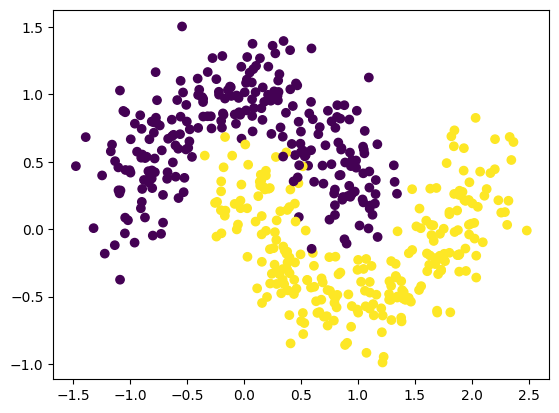

In [4]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

Logistic Regression Accuracy: 0.856


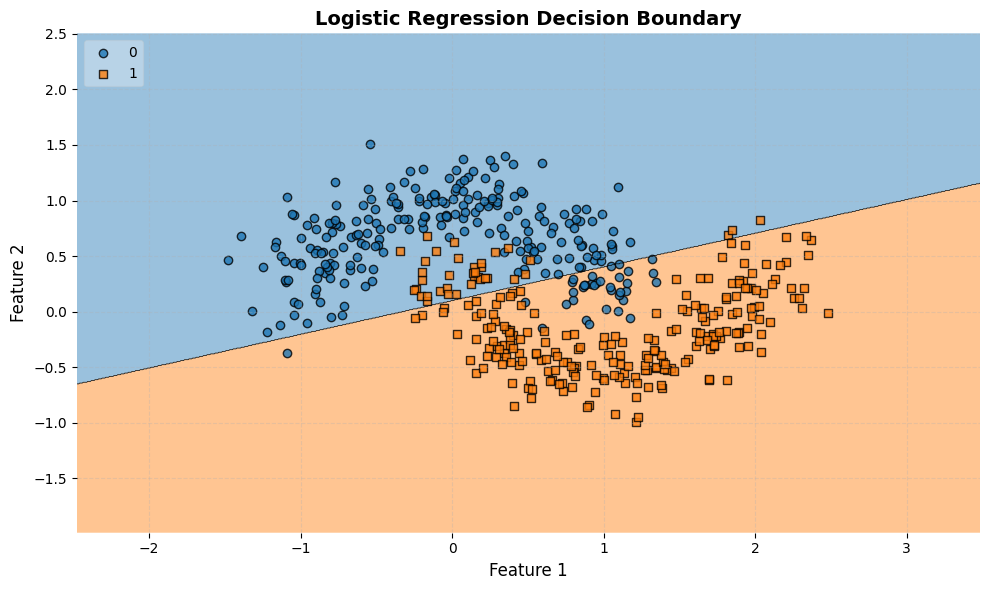

Linear SVM Accuracy: 0.858


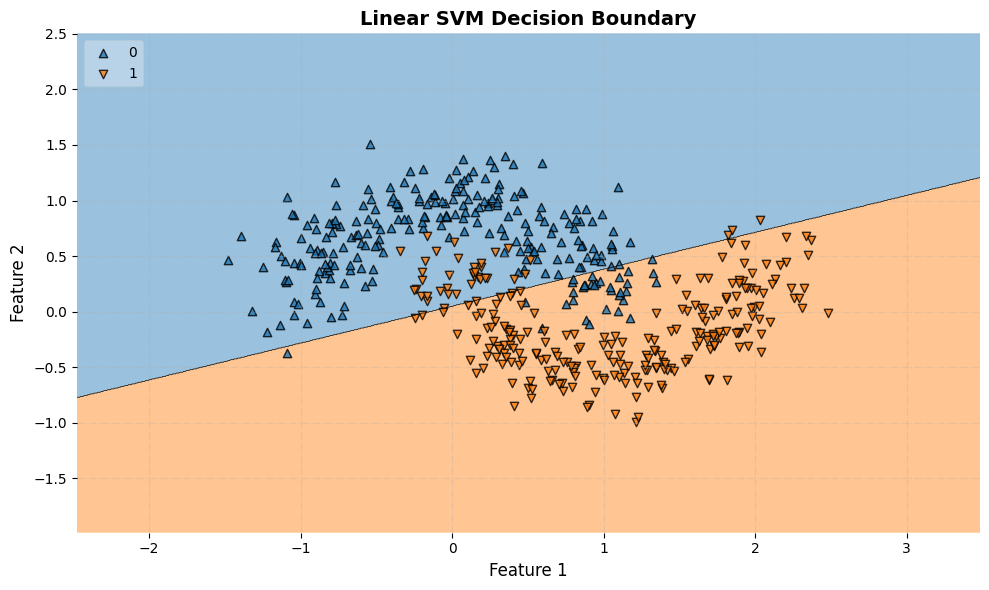

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Синтетический набор данных
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)

# Логистическая регрессия
lr = LogisticRegression()
lr.fit(moons_points, moons_labels)
print("Logistic Regression Accuracy:", accuracy_score(moons_labels, lr.predict(moons_points)))

# Граница решения для логистической регресии
plt.figure(figsize=(10, 6))
plot_decision_regions(moons_points, moons_labels, clf=lr, legend=2, markers=['o', 's'])
plt.title("Logistic Regression Decision Boundary", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Линейный SVM
svm_linear = SVC(kernel="linear")
svm_linear.fit(moons_points, moons_labels)
print("Linear SVM Accuracy:", accuracy_score(moons_labels, svm_linear.predict(moons_points)))

# Граница решения графика для линейного SVM
plt.figure(figsize=(10, 6))
plot_decision_regions(moons_points, moons_labels, clf=svm_linear, legend=2, markers=['^', 'v'])
plt.title("Linear SVM Decision Boundary", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.grid(alpha=0.3, linestyle='-.')
plt.tight_layout()
plt.show()


Классификаторы логистической регрессии и линейной SVM достигают сопоставимой точности (0,856 и 0,858 соответственно), демонстрируя, что обе линейные модели эффективно разделяют два класса в этом наборе данных. Однако границы решения немного отличаются из-за различных целей оптимизации логистической регрессии и SVM.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

Polynomial Kernel SVM Accuracy: 0.906


c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


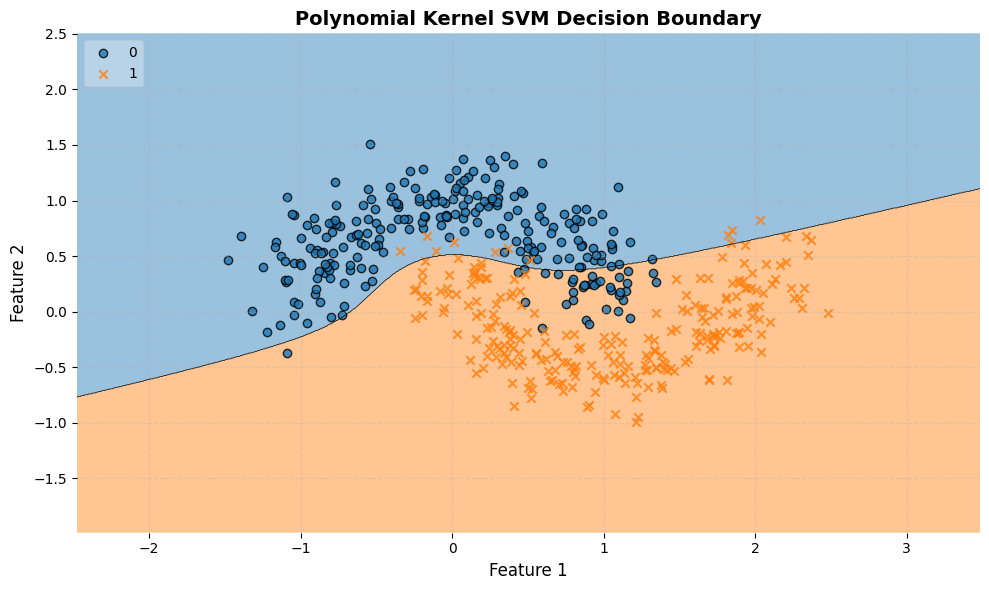

RBF Kernel SVM Accuracy: 0.974


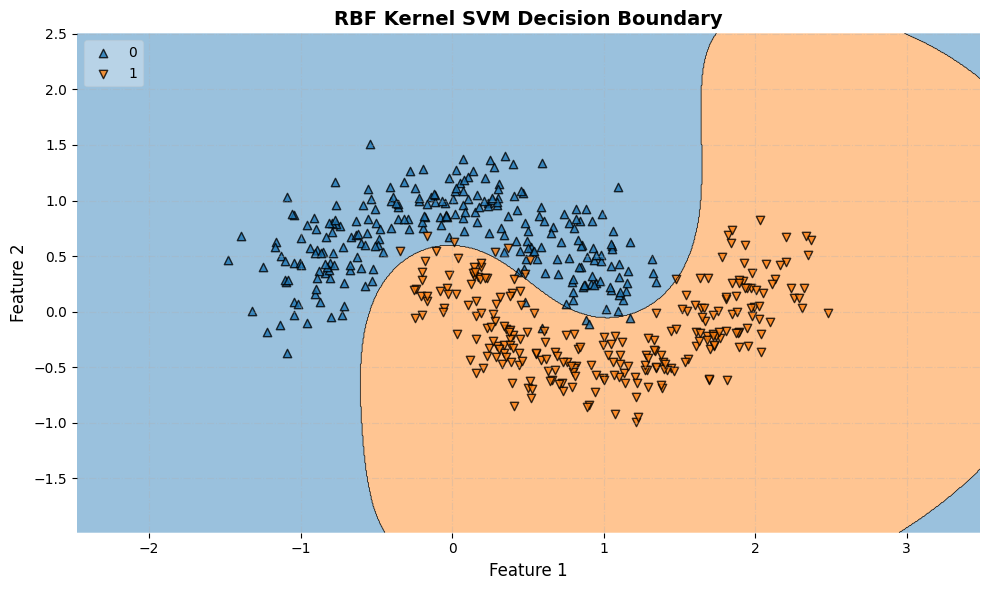

Sigmoid Kernel SVM Accuracy: 0.648


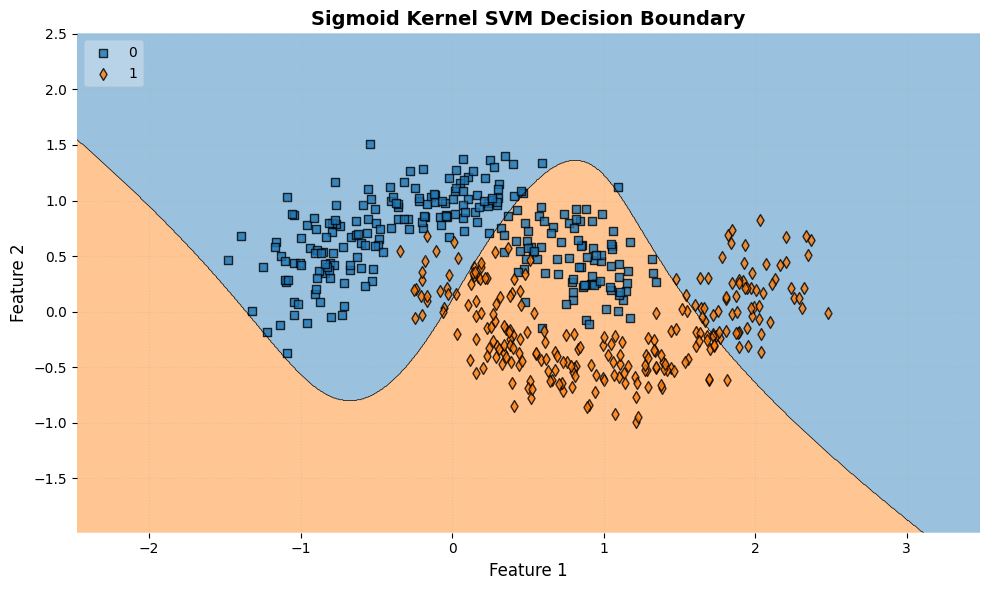

In [ ]:
# SVM с полиномиальным ядром
svm_poly = SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(moons_points, moons_labels)
print("Polynomial Kernel SVM Accuracy:", accuracy_score(moons_labels, svm_poly.predict(moons_points)))

plt.figure(figsize=(10, 6))
plot_decision_regions(moons_points, moons_labels, clf=svm_poly, legend=2, markers=['o', 'x'])
plt.title("Polynomial Kernel SVM Decision Boundary", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# SVM с RBF ядром
svm_rbf = SVC(kernel='rbf', C=1)
svm_rbf.fit(moons_points, moons_labels)
print("RBF Kernel SVM Accuracy:", accuracy_score(moons_labels, svm_rbf.predict(moons_points)))

plt.figure(figsize=(10, 6))
plot_decision_regions(moons_points, moons_labels, clf=svm_rbf, legend=2, markers=['^', 'v'])
plt.title("RBF Kernel SVM Decision Boundary", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.grid(alpha=0.3, linestyle='-.')
plt.tight_layout()
plt.show()

# SVM с сигмовидным ядром
svm_sigmoid = SVC(kernel='sigmoid', C=1)
svm_sigmoid.fit(moons_points, moons_labels)
print("Sigmoid Kernel SVM Accuracy:", accuracy_score(moons_labels, svm_sigmoid.predict(moons_points)))

plt.figure(figsize=(10, 6))
plot_decision_regions(moons_points, moons_labels, clf=svm_sigmoid, legend=2, markers=['s', 'd'])
plt.title("Sigmoid Kernel SVM Decision Boundary", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.grid(alpha=0.3, linestyle=':')
plt.tight_layout()
plt.show()


1. Качество классификации:
Полиномиальное ядро: достигнута точность 0,906. Полиномиальное ядро ​​представляет изогнутую границу решения, позволяя модели захватывать более сложные шаблоны данных по сравнению с линейным ядром.
Ядро RBF: достигнута высочайшая точность — 0,974. Ядро радиальной базисной функции (RBF) хорошо подходит для наборов данных с нелинейной разделимостью, поскольку оно создает плавные и гибкие границы принятия решений.
Сигмовидное ядро: достигнута точность 0,648, что значительно ниже. Сигмовидное ядро ​​иногда сталкивается с нелинейными закономерностями в наборах данных с перекрывающимися областями.

2. Изменения границ решения:
Полиномиальное ядро: введены изогнутые границы, которые менее резкие, чем RBF, в попытке уловить промежуточные сложности во взаимоотношениях данных.
Ядро RBF: созданы высокоадаптивные и плавные границы, позволяющие модели эффективно соответствовать нелинейным данным.
Сигмовидное ядро: создавались границы с более резкими переходами, которые не согласовывались с базовой структурой данных, что приводило к снижению производительности.

3. Выбор степени:
Степень = 3 была выбрана для полиномиального ядра, поскольку она обеспечивает баланс между сложностью и эффективностью вычислений. Более высокие степени могут не соответствовать данным, а более низкие степени могут не отражать достаточную детализацию.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Polynomial Features Logistic Regression Accuracy: 0.968


c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


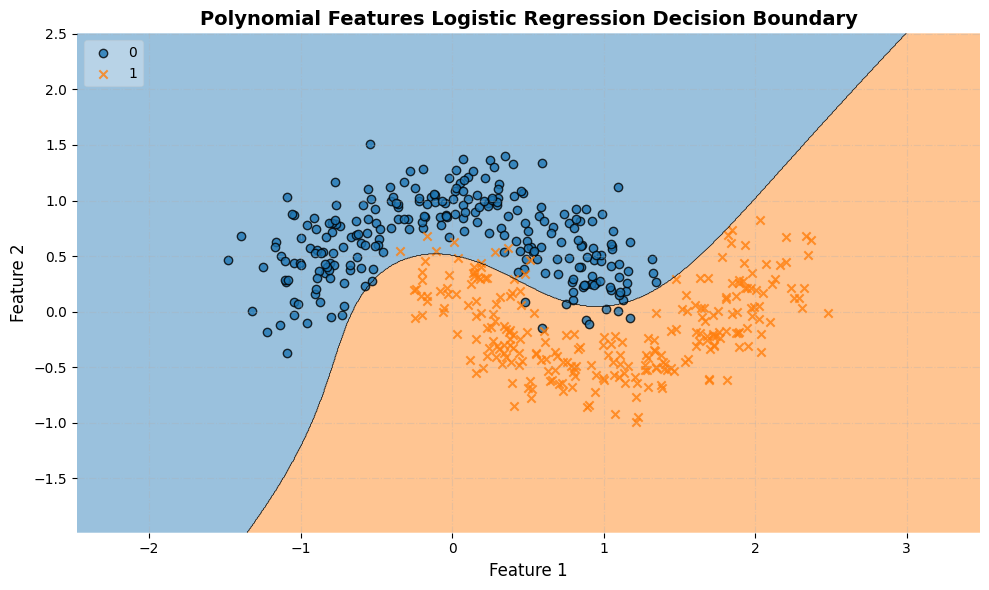

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Создадим конвейер для логистической регрессии с полиномиальными функциями
poly_log_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("log_reg", LogisticRegression(max_iter=500, solver='lbfgs'))
])

# Приемлемо для модели
poly_log_reg.fit(moons_points, moons_labels)
print("Polynomial Features Logistic Regression Accuracy:", accuracy_score(moons_labels, poly_log_reg.predict(moons_points)))

# Граница решения с настраиваемыми настройками
plt.figure(figsize=(10, 6))
plot_decision_regions(moons_points, moons_labels, clf=poly_log_reg, legend=2, markers=['o', 'x'])
plt.title("Polynomial Features Logistic Regression Decision Boundary", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.grid(alpha=0.3, linestyle='-.')
plt.tight_layout()
plt.show()

Логистическая регрессия с полиномиальными функциями
Точность: достигнуто 0,968, что указывает на хорошее соответствие набору данных. Добавление полиномиальных функций улучшает способность модели улавливать нелинейные связи.
Граница решения: граница решения изогнута и хорошо адаптируется к сложной структуре данных, подобно тому, что мы наблюдали с нелинейными ядрами в SVM.

Сравнение с полиномиальным ядром SVM
Точность: SVM с полиномиальным ядром достигла значения 0,906, что немного ниже, чем у логистической регрессии с полиномиальными признаками. Это может указывать на лучшую оптимизацию или регуляризацию модели логистической регрессии для этого конкретного набора данных.
Сложность: граница принятия решения модели логистической регрессии менее сложна, чем полиномиальное ядро ​​SVM, возможно, из-за различий в способах оптимизации моделей.

Полиномиальная степень
Выбранная степень: В обоих случаях использовалась полиномиальная степень 3. Эта степень уравновешивает компромисс между фиксацией достаточной сложности данных и избежанием переобучения. Более высокие степени могут привести к слишком сложным границам, в то время как более низкие степени могут не эффективно отражать основную структуру

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

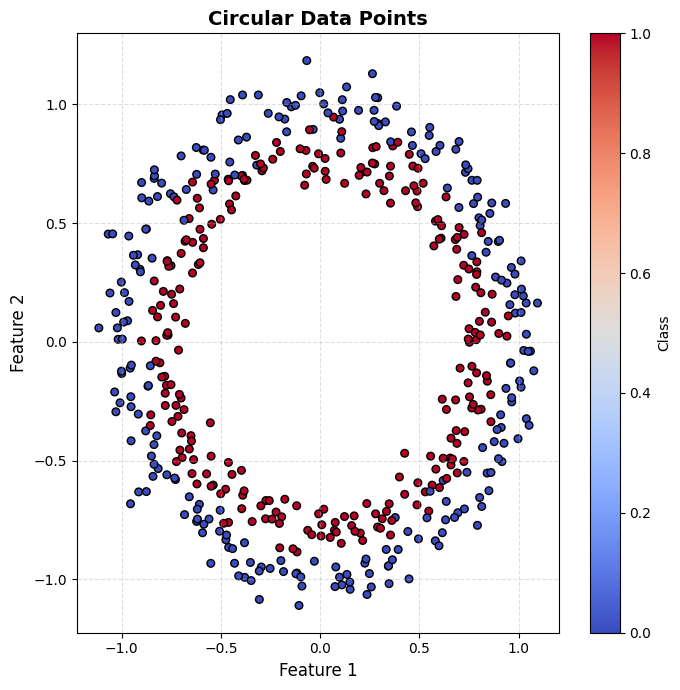

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Генерация круговых точек данных
circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

# Круговые точки данных с пользовательскими настройками
plt.figure(figsize=(7, 7))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels, cmap='coolwarm', edgecolor='k', s=30)
plt.title("Circular Data Points", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.grid(alpha=0.4, linestyle='--')
plt.colorbar(label="Class")
plt.tight_layout()
plt.show()


And even more:

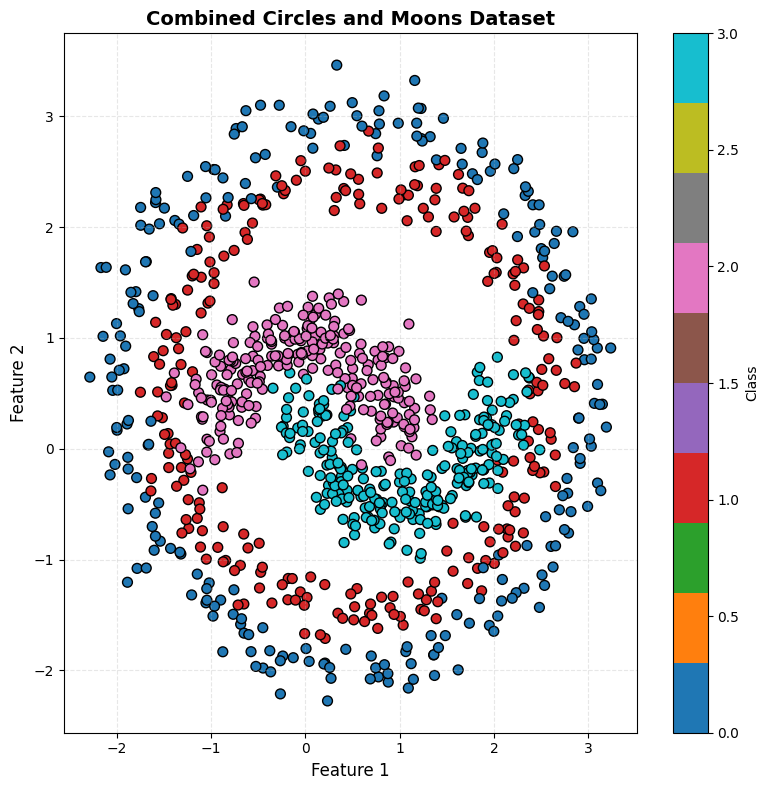

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Объединим данные с помощью преобразований
points = np.vstack((circles_points * 2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))

# Объединенный набор данных с пользовательскими настройками визуализации
plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='tab10', edgecolor='k', s=50)
plt.title("Combined Circles and Moons Dataset", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.grid(alpha=0.3, linestyle='--')
plt.colorbar(label="Class")
plt.tight_layout()
plt.show()


Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

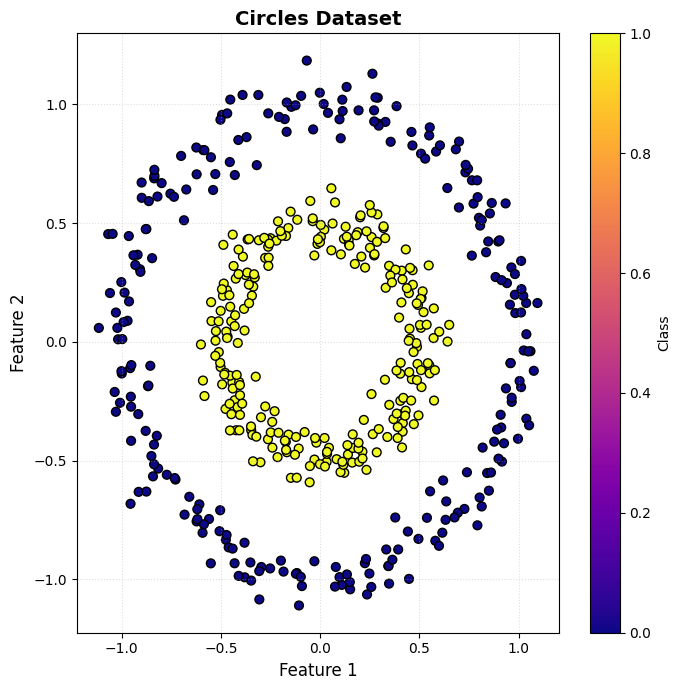

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Круговой набор данных с измененным коэффициентом
circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42, factor=0.5)

# Набор круговых данных с пользовательскими настройками
plt.figure(figsize=(7, 7))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels, cmap='plasma', edgecolor='k', s=40)
plt.title("Circles Dataset", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.grid(alpha=0.4, linestyle=':')
plt.colorbar(label="Class")
plt.tight_layout()
plt.show()


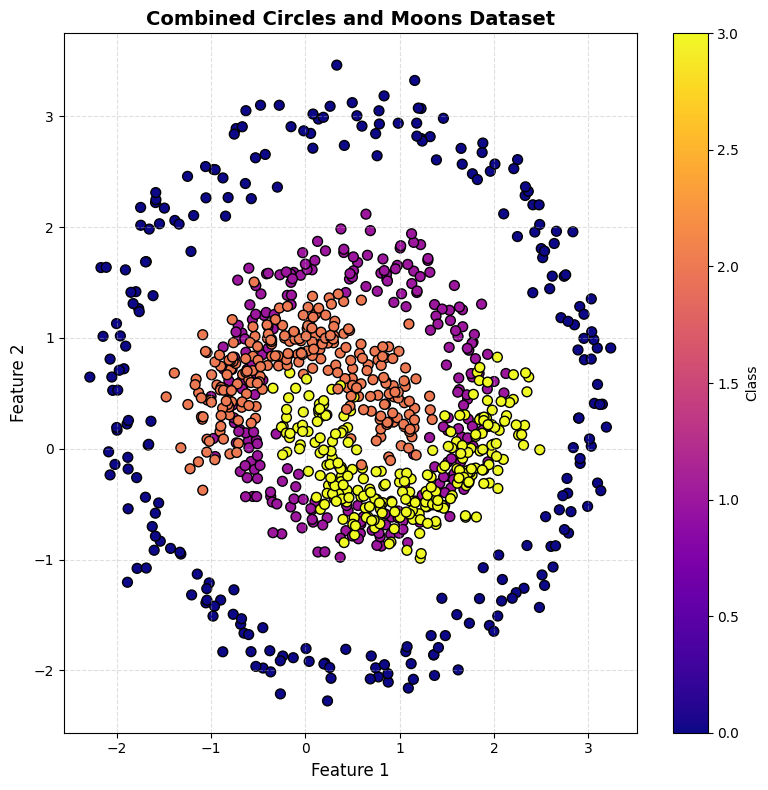

RBF Kernel SVM Accuracy on Combined Dataset: 0.846


c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


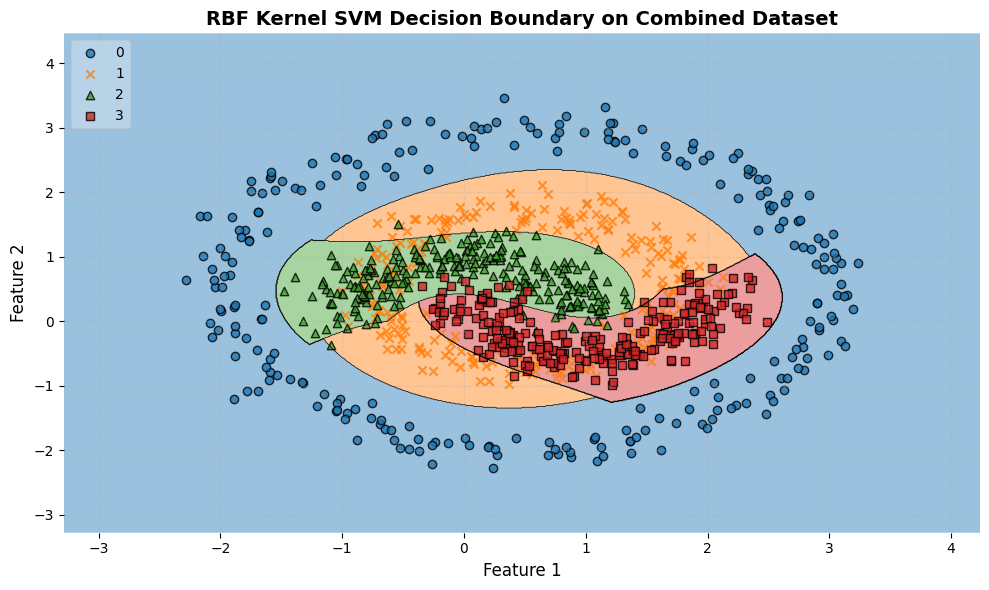

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Объединим наборы данных
points = np.vstack((circles_points * 2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))

# Объединенный набор данных
plt.figure(figsize=(8, 8))
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='plasma', edgecolor='k', s=50)
plt.title("Combined Circles and Moons Dataset", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.grid(alpha=0.4, linestyle='--')
plt.colorbar(label="Class")
plt.tight_layout()
plt.show()

# Применим SVM с RBF ядром к объединенному набору данных
svm_rbf_combined = SVC(kernel='rbf', C=1)
svm_rbf_combined.fit(points, labels)
print("RBF Kernel SVM Accuracy on Combined Dataset:", accuracy_score(labels, svm_rbf_combined.predict(points)))

# Граница решения графика SVM с RBF ядром
plt.figure(figsize=(10, 6))
plot_decision_regions(points, labels, clf=svm_rbf_combined, legend=2, markers=['o', 'x', '^', 's'])
plt.title("RBF Kernel SVM Decision Boundary on Combined Dataset", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.grid(alpha=0.3, linestyle='-.')
plt.tight_layout()
plt.show()


Набор круговых данных:

Набор данных содержит концентрические круговые узоры, что делает его нелинейно разделимой проблемой.
Простая линейная модель не сможет отразить базовое распределение, но такие модели, как SVM с ядром RBF, могут уловить сложность, отображая данные в многомерное пространство признаков.
Визуализация показывает четко определенные границы классов, которые совпадают с круговыми узорами, что объясняет относительно высокую точность.


Комбинированный набор данных:

Объединение наборов данных усложняет задачу, поскольку шаблоны из разных распределений перекрываются.
Ядро RBF в SVM хорошо адаптируется к этой сложности, обеспечивая плавные границы принятия решений, которые эффективно разделяют три отдельных класса.
Несмотря на сложность, модель сохраняет разумную точность (~ 84,6%), что подчеркивает адаптивность RBF к многоклассовым нелинейным разделимым данным.


Сильные стороны ядра RBF:

Ядро RBF идеально подходит для наборов данных с нелинейными границами, поскольку оно проецирует данные в пространство объектов, где гиперплоскость может разделять классы.
В этом случае оно успешно фиксирует сложные закономерности как в отдельных, так и в объединенных наборах данных.


Сравнение с другими ядрами/моделями:

Линейные модели (например, логистическая регрессия) или ядра (например, полиномиальные с более низкими степенями) будут испытывать трудности из-за нелинейной разделимости данных.
Производительность ядра RBF подчеркивает его эффективность в сценариях с высокой изменчивостью и сложными закономерностями.


Заключение:
Результаты подтверждают использование SVM с ядром RBF для нелинейно разделимых наборов данных. Выбор ядра и его параметров напрямую влияет на способность модели обобщать сложные шаблоны в условиях нескольких классов.